In [3]:
import pandas as pd


def load_csv(data_path):
    """
    Loads the data set and return a pandas DataFrame
    :param str data_path: Path to data csv file
    :return: pandas DataFrame read from the file
    """
    from os import path
    assert isinstance(data_path, str)
    assert path.exists(data_path), f'{data_path} does not exist!'
    assert data_path[-4:] == '.csv', 'Input file has to be csv!'
    return pd.read_csv(data_path)


def clean_data(original_data):
    """
    Filter out unwanted and invalid data from the data set
    :param DataFrame original_data: Original DataFrame read from data csv
    :return: Filtered pandas DataFrame
    """
    assert isinstance(original_data, pd.DataFrame)
    filtered_data = original_data.copy()
    filtered_data.drop(['v18q1'], axis=1, inplace=True)
    # TODO: Add other filtering
    return filtered_data


def get_training_set():
    """
    Load training.csv and clean it
    :return: Cleaned train.csv pandas DataFrame
    """
    return clean_data(load_csv('train.csv'))


if __name__ == '__main__':
    data = get_training_set()
    print(data)



                Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  r4h1  \
0     ID_279628684  190000.0       0      3       0     1       1     0     0   
1     ID_f29eb3ddd  135000.0       0      4       0     1       1     1     0   
2     ID_68de51c94       NaN       0      8       0     1       1     0     0   
3     ID_d671db89c  180000.0       0      5       0     1       1     1     0   
4     ID_d56d6f5f5  180000.0       0      5       0     1       1     1     0   
5     ID_ec05b1a7b  180000.0       0      5       0     1       1     1     0   
6     ID_e9e0c1100  180000.0       0      5       0     1       1     1     0   
7     ID_3e04e571e  130000.0       1      2       0     1       1     0     0   
8     ID_1284f8aad  130000.0       1      2       0     1       1     0     0   
9     ID_51f52fdd2  130000.0       1      2       0     1       1     0     0   
10    ID_db44f5c59  130000.0       1      2       0     1       1     0     0   
11    ID_de822510c  100000.0

In [4]:
# Heads of household
heads = data.loc[data['parentesco1'] == 1].copy()

# Labels for training
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
import matplotlib.pyplot as plt
label_counts.plot.bar(figsize = (8, 6), 
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Poverty Level'); plt.ylabel('Count'); 

plt.title('Poverty Level Breakdown');

label_counts


1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

In [5]:
data[['Id','Target', 'lugar1', 'lugar2','lugar3', 'lugar4', 'lugar5', 'lugar6','escolari','parentesco1']] 

,Id,Target,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,escolari,parentesco1
0,ID_279628684,4,1,0,0,0,0,0,10,1
1,ID_f29eb3ddd,4,1,0,0,0,0,0,12,1
2,ID_68de51c94,4,1,0,0,0,0,0,11,1
3,ID_d671db89c,4,1,0,0,0,0,0,9,0
4,ID_d56d6f5f5,4,1,0,0,0,0,0,11,0
5,ID_ec05b1a7b,4,1,0,0,0,0,0,11,1
6,ID_e9e0c1100,4,1,0,0,0,0,0,2,0
7,ID_3e04e571e,4,1,0,0,0,0,0,0,0
8,ID_1284f8aad,4,1,0,0,0,0,0,9,1
9,ID_51f52fdd2,4,1,0,0,0,0,0,11,0


In [6]:

N = len(data['Id'])
x1 = [data['lugar1'][i] == 1 and data['Target'][i]==1 and data['parentesco1'][i] == 1 for i in range(N)]
#x1 =  data['lugar1'] == ((data['Target']==1) == (data['parentesco1'] == 1))
x2 = [data['lugar2'][i] == 1 and data['Target'][i]==1 and data['parentesco1'][i] == 1 for i in range(N)]
x3 = [data['lugar3'][i] == 1 and data['Target'][i]==1 and data['parentesco1'][i] == 1 for i in range(N)]
x4 = [data['lugar4'][i] == 1 and data['Target'][i]==1 and data['parentesco1'][i] == 1 for i in range(N)]
x5 = [data['lugar5'][i] == 1 and data['Target'][i]==1 and data['parentesco1'][i] == 1 for i in range(N)]
x6 = [data['lugar6'][i] == 1 and data['Target'][i]==1 and data['parentesco1'][i] == 1 for i in range(N)]

y1 = [data['lugar1'][i] == 1 and data['Target'][i]==2 and data['parentesco1'][i] == 1 for i in range(N)]
y2 = [data['lugar2'][i] == 1 and data['Target'][i]==2 and data['parentesco1'][i] == 1 for i in range(N)]
y3 = [data['lugar3'][i] == 1 and data['Target'][i]==2 and data['parentesco1'][i] == 1 for i in range(N)]
y4 = [data['lugar4'][i] == 1 and data['Target'][i]==2 and data['parentesco1'][i] == 1 for i in range(N)]
y5 = [data['lugar5'][i] == 1 and data['Target'][i]==2 and data['parentesco1'][i] == 1 for i in range(N)]
y6 = [data['lugar6'][i] == 1 and data['Target'][i]==2 and data['parentesco1'][i] == 1 for i in range(N)]

a1 = [data['lugar1'][i] == 1 and data['Target'][i]==3 and data['parentesco1'][i] == 1 for i in range(N)]
a2 = [data['lugar2'][i] == 1 and data['Target'][i]==3 and data['parentesco1'][i] == 1 for i in range(N)]
a3 = [data['lugar3'][i] == 1 and data['Target'][i]==3 and data['parentesco1'][i] == 1 for i in range(N)]
a4 = [data['lugar4'][i] == 1 and data['Target'][i]==3 and data['parentesco1'][i] == 1 for i in range(N)]
a5 = [data['lugar5'][i] == 1 and data['Target'][i]==3 and data['parentesco1'][i] == 1 for i in range(N)]
a6 = [data['lugar6'][i] == 1 and data['Target'][i]==3 and data['parentesco1'][i] == 1 for i in range(N)]

b1 = [data['lugar1'][i] == 1 and data['Target'][i]==4 and data['parentesco1'][i] == 1 for i in range(N)]
b2 = [data['lugar2'][i] == 1 and data['Target'][i]==4 and data['parentesco1'][i] == 1 for i in range(N)]
b3 = [data['lugar3'][i] == 1 and data['Target'][i]==4 and data['parentesco1'][i] == 1 for i in range(N)]
b4 = [data['lugar4'][i] == 1 and data['Target'][i]==4 and data['parentesco1'][i] == 1 for i in range(N)]
b5 = [data['lugar5'][i] == 1 and data['Target'][i]==4 and data['parentesco1'][i] == 1 for i in range(N)]
b6 = [data['lugar6'][i] == 1 and data['Target'][i]==4 and data['parentesco1'][i] == 1 for i in range(N)]

xx = [data['lugar1'][i]==1 and data['parentesco1'][i] == 1 for i in range(N)]
'xx is the total households live in lugar1'
print(sum(xx))

z=b1+b2+b3+b4+b5+b6
'z is the total number of Target = 4'

yy = x1+y1+a1+b1

print(sum(yy))
print(sum(x1))
print(sum(y1))
print(sum(a1))
print(sum(b1))
print(sum(z))

1757
1757
91
206
188
1272
1954


In [2]:
#plot(x='lugar1','lugar2','lugar3','lugar4','')
plt.figure('Line fig')
ax = plt.gca()
ax.set_xlabel('Different regions in Costa Rica')
ax.set_ylabel('Househols')
plt.plot(['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], [sum(x1),sum(x2),sum(x3),sum(x4),sum(x5),sum(x6)], 
         ['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], [sum(y1),sum(y2),sum(y3),sum(y4),sum(y5),sum(y6)],
         ['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], [sum(a1),sum(a2),sum(a3),sum(a4),sum(a5),sum(a6)],
         ['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], [sum(b1),sum(b2),sum(b3),sum(b4),sum(b5),sum(b6)], label ='1,2,3,4')

NameError: name 'plt' is not defined

In [8]:
item = ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']
cnt = [0] * len(item)
for j in range(len(item)):
    for i in range(N):
        if data[item[j]][i] == 1:
             cnt[j] += data['escolari'][i] and data['parentesco1'][i] == 1
                
#aa = [data['escolari'][i] and data['parentesco1'][i] == 1 for i in range(N)]
#print(sum(aa))

print(cnt[0])
print(cnt[5])

1701
208


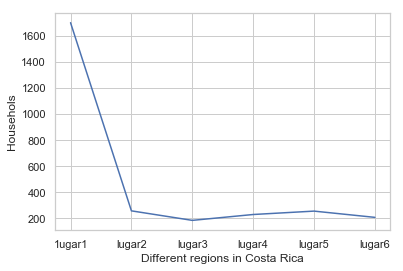

In [9]:
plt.figure('Line fig')
ax = plt.gca()
ax.set_xlabel('Different regions in Costa Rica')
ax.set_ylabel('Househols')
plt.plot(['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], 
         [cnt[0],cnt[1],cnt[2],cnt[3],cnt[4],cnt[5]], label ='The years in school')

In [49]:
item = ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']
house = [0] * len(item)
for j in range(len(item)):
    for i in range(N):
        if data[item[j]][i] == 1:
             house[j] += (data['epared3'][i] + data['etecho3'][i] + data['eviv3'][i]) and data['parentesco1'][i] == 1
print(house[0])
print(house[1])

1412
168


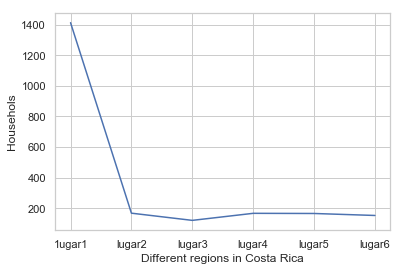

In [50]:
plt.figure('Line fig')
ax = plt.gca()
ax.set_xlabel('Different regions in Costa Rica')
ax.set_ylabel('Househols')
plt.plot(['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], 
         [house[0],house[1],house[2],house[3],house[4],house[5]], label = 'Houses in goood conditions')

In [12]:
item = ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']
tech = [0] * len(item)
for j in range(len(item)):
    for i in range(N):
        if data[item[j]][i] == 1:
             tech[j] += (data['computer'][i] + data['television'][i]) and data['parentesco1'][i] == 1 
print(tech[0])
print(tech[5])

701
38


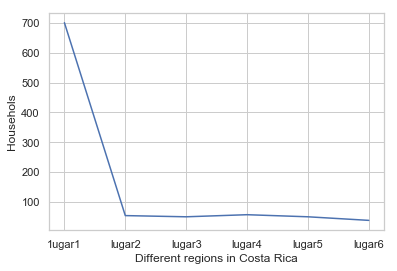

In [13]:
plt.figure('Line fig')
ax = plt.gca()
ax.set_xlabel('Different regions in Costa Rica')
ax.set_ylabel('Househols')
plt.plot(['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], 
         [tech[0],tech[1],tech[2],tech[3],tech[4],tech[5]], label ='Computer and television')

In [14]:
item = ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']
home = [0] * len(item)
for j in range(len(item)):
    for i in range(N):
        if data[item[j]][i] == 1:
             home[j] += data['tipovivi1'][i] and data['parentesco1'][i] == 1
print(home[0])
print(home[5])

1070
149


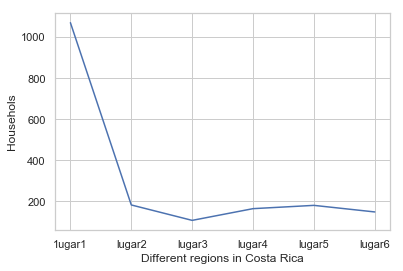

In [15]:
plt.figure('Line fig')
ax = plt.gca()
ax.set_xlabel('Different regions in Costa Rica')
ax.set_ylabel('Househols')
plt.plot(['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], 
         [home[0],home[1],home[2],home[3],home[4],home[5]], label = 'Own and fully paid house')

In [16]:
item = ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']
education = [0] * len(item)
for j in range(len(item)):
    for i in range(N):
        if data[item[j]][i] == 1:
             education[j] += (data['instlevel9'][i]*2 + data['instlevel8'][i]) and data['parentesco1'][i] == 1
print(education[0])
print(education[5])

440
17


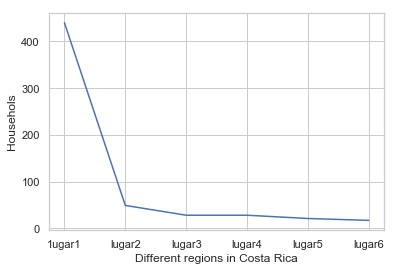

In [17]:
plt.figure('Line fig')
ax = plt.gca()
ax.set_xlabel('Different regions in Costa Rica')
ax.set_ylabel('Househols')
plt.plot(['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], 
         [education[0],education[1],education[2],education[3],education[4],education[5]], label='Receive higher education')

In [18]:
#area1, =1 zona urbana
#area2, =2 zona rural
item = ['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']
urbana = [0] * len(item)
for j in range(len(item)):
    for i in range(N):
        if data[item[j]][i] == 1:
             urbana[j] += data['area1'][i] and data['parentesco1'][i] == 1
rural= [0] * len(item)
for j in range(len(item)):
    for i in range(N):
        if data[item[j]][i] == 1:
             rural[j] += (data['area2'][i] and data['parentesco1'][i] == 1)/2
print(urbana[0])
print(rural[0])

1505
126.0


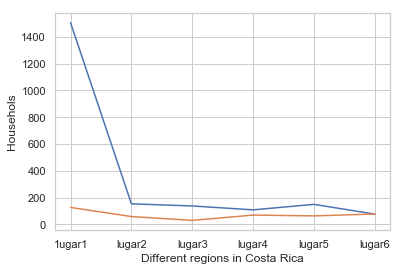

In [19]:
plt.figure('Line fig')
ax = plt.gca()
ax.set_xlabel('Different regions in Costa Rica')
ax.set_ylabel('Househols')

plt.plot(['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], 
         [urbana[0],urbana[1],urbana[2],urbana[3],urbana[4],urbana[5]], label='Urbana')
plt.plot(['1ugar1','lugar2','lugar3','lugar4','lugar5','lugar6'], 
         [rural[0],rural[1],rural[2],rural[3],rural[4],rural[5]], label='Rural')


C:\Users\asus-user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'Households that possesses computer have higher average years of education.'

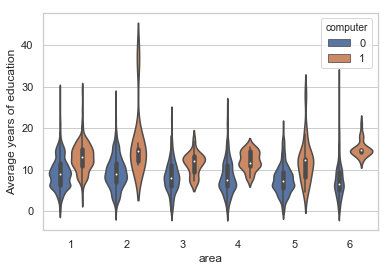

In [33]:
import seaborn as sns
#tips = sns.load_dataset("./train.csv")
sns.set(style="whitegrid")
data['Average years of education']= data['meaneduc']
data['area'] = data['lugar1']*1 + data['lugar2']*2 + data['lugar3']*3 + data['lugar4']*4 + data['lugar5']*5 + data['lugar6']*6
ax = sns.violinplot(x='area', y='Average years of education', hue ='computer' , data=data)
'Households that possesses computer have higher average years of education.'

C:\Users\asus-user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'Here we can see whether the household has television does not influence average years in school very much.'

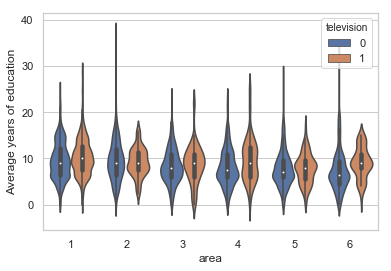

In [52]:
ax = sns.violinplot(x='area', y='Average years of education', hue ='television' , data=data)
'Here we can see whether the household has television does not influence average years in school very much.'

C:\Users\asus-user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'The poverty gap in area 1 is the largest.'

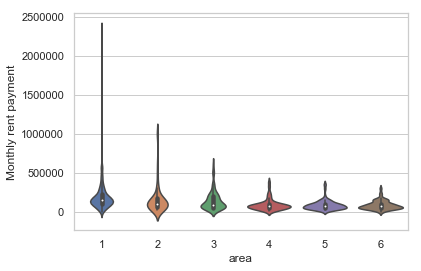

In [66]:
data['Monthly rent payment']= data['v2a1']
ax = sns.violinplot(x='area', y='Monthly rent payment', data=data)
'The poverty gap in area 1 is the largest.'

C:\Users\asus-user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


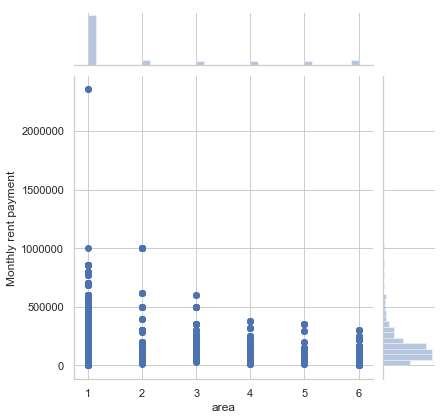

In [64]:
ax = sns.jointplot(x='area', y='Monthly rent payment',  data=data)

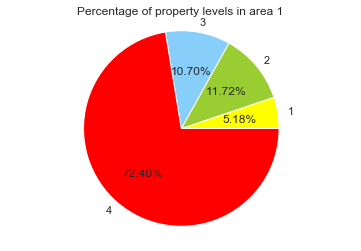

In [84]:
sizes=[sum(x1),sum(y1), sum(a1),sum(b1)]
colors = ['yellow','yellowgreen','lightskyblue','red']
labels = [u'1',u'2',u'3',u'4']
plt.pie(sizes, colors=colors, labels=labels, autopct = '%3.2f%%')
plt.axis('equal')
plt.title('Percentage of property levels in area 1')
plt.show()

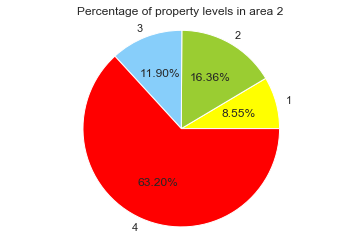

In [86]:
sizes=[sum(x2),sum(y2), sum(a2),sum(b2)]
colors = ['yellow','yellowgreen','lightskyblue','red']
labels = [u'1',u'2',u'3',u'4']
plt.pie(sizes, colors=colors, labels=labels, autopct = '%3.2f%%')
plt.axis('equal')
plt.title('Percentage of property levels in area 2')
plt.show()

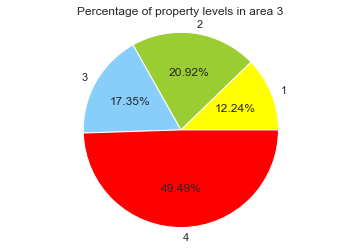

In [87]:
sizes=[sum(x3),sum(y3), sum(a3),sum(b3)]
colors = ['yellow','yellowgreen','lightskyblue','red']
labels = [u'1',u'2',u'3',u'4']
plt.pie(sizes, colors=colors, labels=labels, autopct = '%3.2f%%')
plt.axis('equal')
plt.title('Percentage of property levels in area 3')
plt.show()

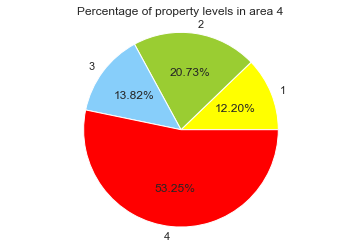

In [88]:
sizes=[sum(x4),sum(y4), sum(a4),sum(b4)]
colors = ['yellow','yellowgreen','lightskyblue','red']
labels = [u'1',u'2',u'3',u'4']
plt.pie(sizes, colors=colors, labels=labels, autopct = '%3.2f%%')
plt.axis('equal')
plt.title('Percentage of property levels in area 4')
plt.show()

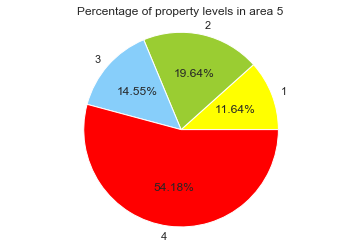

In [89]:
sizes=[sum(x5),sum(y5), sum(a5),sum(b5)]
colors = ['yellow','yellowgreen','lightskyblue','red']
labels = [u'1',u'2',u'3',u'4']
plt.pie(sizes, colors=colors, labels=labels, autopct = '%3.2f%%')
plt.axis('equal')
plt.title('Percentage of property levels in area 5')
plt.show()

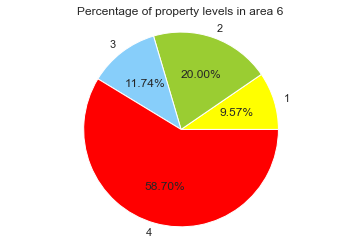

In [90]:
sizes=[sum(x6),sum(y6), sum(a6),sum(b6)]
colors = ['yellow','yellowgreen','lightskyblue','red']
labels = [u'1',u'2',u'3',u'4']
plt.pie(sizes, colors=colors, labels=labels, autopct = '%3.2f%%')
plt.axis('equal')
plt.title('Percentage of property levels in area 6')
plt.show()

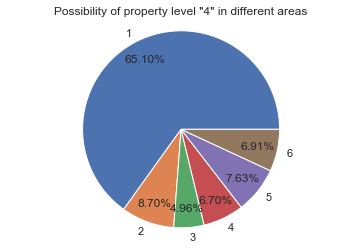

In [101]:
sizes=[sum(b1),sum(b2), sum(b3),sum(b4),sum(b5),sum(b6)]
labels = [u'1',u'2',u'3',u'4',u'5',u'6']
plt.pie(sizes, labels=labels, autopct = '%3.2f%%', pctdistance = 0.8)
plt.axis('equal')
plt.title('Possibility of property level "4" in different areas')
plt.show()